# Neural Networks

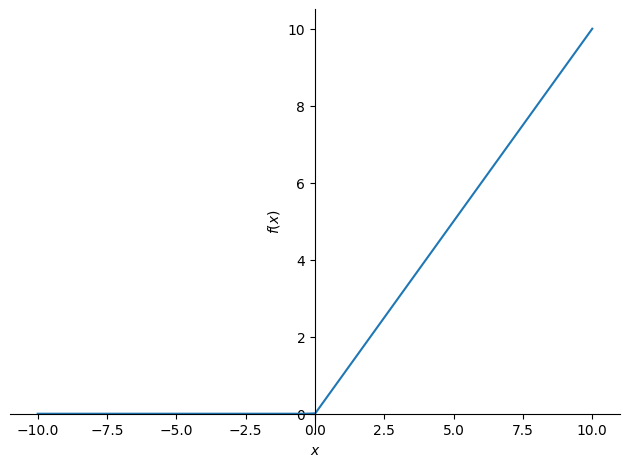

In [1]:
# Example 7-1. Plotting the ReLU function 
from sympy import *

# plot relu
x = symbols('x')
relu = Max(0, x)
plot(relu)

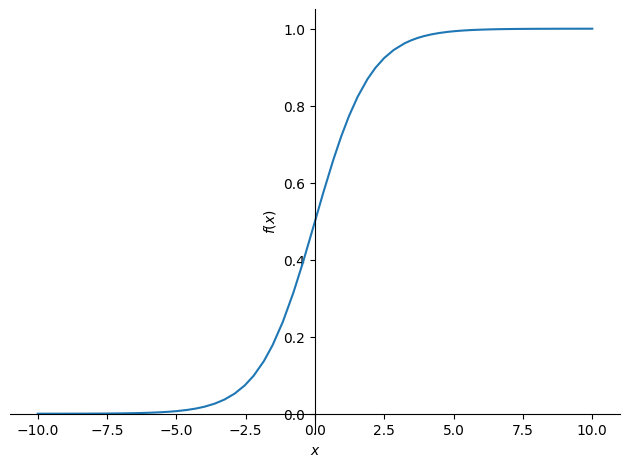

In [2]:
# Example 7-2. Logistic activation function in SymPy 
from sympy import *

# plot logistic
x = symbols('x')
logistic = 1 / (1 + exp(-x))
plot(logistic)


In [3]:
# Example 7-3. A simple forward propagation network with random weight and bias values 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# Extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# Split train and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1/3)
n = X_train.shape[0] # number of training records

# Build neural network with weights and biases
# with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# Activation functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3] # grab only output layer, A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)


ACCURACY:  0.6347438752783953


In [5]:
# Example 7-7. Calculating the derivative of the cost function with respect to  
from sympy import *

A2, Y = symbols('A2 Y')
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print(dC_dA2) # 2*A2 - 2*Y

2*A2 - 2*Y


In [6]:
# Example 7-8. Finding the derivative of  with respect to  
from sympy import *

Z2 = symbols('Z2')

logistic = lambda x: 1 / (1 + exp(-x))

A2 = logistic(Z2)
dA2_dZ2 = diff(A2, Z2)
print(dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

exp(-Z2)/(1 + exp(-Z2))**2


In [7]:
# Example 7-9. Derivative of  with respect to  
from sympy import *

A1, W2, B2 = symbols('A1, W2, B2')

Z2 = A1*W2 + B2
dZ2_dW2 = diff(Z2, W2)
print(dZ2_dW2) # A1

A1


In [8]:
# Example 7-10. Calculating all the partial derivatives we will need for our neural network 
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = \
    symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Calculate derivative of cost function with respect to A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Calculate derivative of A2 with respect to Z2
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# Calculate derivative of Z2 with respect to A1
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1) # W2

# Calculate derivative of Z2 with respect to W2
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2) # A1

# Calculate derivative of Z2 with respect to B2
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2) # 1

# Calculate derivative of A1 with respect to Z1
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # Slope is 1 if positive, 0 if negative
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# Calculate derivative of Z1 with respect to W1
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1) # X

# Calculate derivative of Z1 with respect to B1
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


In [9]:
# Example 7-11. Implementing a neural network using stochastic gradient descent 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

all_data = pd.read_csv("https://tinyurl.com/y2qmhfsr")

# Learning rate controls how slowly we approach a solution
# Make it too small, it will take too long to run.
# Make it too big, it will likely overshoot and miss the solution.
L = 0.05

# Extract the input columns, scale down by 255
all_inputs = (all_data.iloc[:, 0:3].values / 255.0)
all_outputs = all_data.iloc[:, -1].values

# Split train and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs,
    test_size=1 / 3)
n = X_train.shape[0]


# Build neural network with weights and biases
# with random initialization
w_hidden = np.random.rand(3, 3)
w_output = np.random.rand(1, 3)

b_hidden = np.random.rand(3, 1)
b_output = np.random.rand(1, 1)

# Activation functions
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Runs inputs through the neural network to get predicted outputs
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivatives of Activation functions
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# returns slopes for weights and biases
# using chain rule
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Execute gradient descent
for i in range(100_000):
    # randomly select one of the training data
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # run randomly selected training data through neural network
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribute error through backpropagation
    # and return slopes for weights and biases
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # update weights and biases
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

# Calculate accuracy
test_predictions = forward_prop(X_test.transpose())[3]  # grab only A2
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)


ACCURACY:  0.9821826280623535


In [10]:
# Example 7-12. Adding an interactive shell to our neural network 
# Interact and test with new colors
def predict_probability(r, g, b):
    X = np.array([[r, g, b]]).transpose() / 255
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(r, g, b):
    output_values = predict_probability(r, g, b)
    if output_values > .5:
        return "DARK"
    else:
        return "LIGHT"

while True:
    col_input = input("Predict light or dark font. Input values R,G,B: ")
    (r, g, b) = col_input.split(",")
    print(predict_font_shade(int(r), int(g), int(b)))


LIGHT


ValueError: not enough values to unpack (expected 3, got 1)

In [11]:
# Example 7-13. Using scikit-learn neural network classifier 
import pandas as pd
# load data
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://bit.ly/3GsNzGt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
# Note we should do some linear scaling here
X = (df.values[:, :-1] / 255.0)

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

# Print weights and biases
print(nn.coefs_ )
print(nn.intercepts_)

print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))


[array([[-3.39484738e+00,  2.04353434e-01, -7.48130599e-01],
       [-7.00756196e+00, -8.69678118e-01, -2.84575022e-03],
       [-1.23445659e+00,  1.38017260e-01, -4.05146226e-01]]), array([[-10.07104506],
       [  0.392668  ],
       [  0.70535451]])]
[array([ 6.39340081, -0.36964482, -0.22782959]), array([6.20288916])]
Training set score: 0.995536
Test set score: 0.995546


In [15]:
import pandas as pd
# load data
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(3, ),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.05)

nn.fit(X_train, Y_train)

print("Training set score: %f" % nn.score(X_train, Y_train))
print("Test set score: %f" % nn.score(X_test, Y_test))

print("Confusion matrix:")
matrix = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(matrix)


Training set score: 0.527778
Test set score: 0.555556
Confusion matrix:
[[10  0]
 [ 8  0]]
